In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"

print("Scaricamento dati ristorante in corso...")
df = pd.read_csv(url)

print("Dati caricati! Ecco le colonne che abbiamo:")
print(df.columns.tolist())
print("-" * 40)

Scaricamento dati ristorante in corso...
Dati caricati! Ecco le colonne che abbiamo:
['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
----------------------------------------


In [3]:
print(df.head())
print("-" * 40)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
----------------------------------------


In [4]:

mancia_media = df['tip'].mean()
print(f"\n1. La mancia media è: ${mancia_media:.2f}")


1. La mancia media è: $3.00


In [5]:
fatturato_per_giorno = df.groupby('day')['total_bill'].sum().sort_values(ascending=False)

print("\n2. Classifica incassi per giorno:")
print(fatturato_per_giorno)
# (Nota come Pandas ordina automaticamente i risultati se usi sort_values)

# DOMANDA 3: I fumatori sono più generosi dei non fumatori?
# Per capirlo, non guardiamo la mancia assoluta, ma la PERCENTUALE rispetto al conto.
# Creiamo una nuova colonna 'tip_pct' (percentuale mancia)
df['tip_pct'] = (df['tip'] / df['total_bill']) * 100

# Raggruppiamo per 'smoker' e facciamo la media della percentuale
generosita = df.groupby('smoker')['tip_pct'].mean()
print("\n3. Percentuale media di mancia (Fumatori vs Non):")
print(generosita)


2. Classifica incassi per giorno:
day
Sat     1778.40
Sun     1627.16
Thur    1096.33
Fri      325.88
Name: total_bill, dtype: float64

3. Percentuale media di mancia (Fumatori vs Non):
smoker
No     15.932846
Yes    16.319604
Name: tip_pct, dtype: float64


In [6]:
# DOMANDA 4: C'è una correlazione tra quanto spendi e quanta mancia lasci?
# In teoria, più alto è il conto, più alta è la mancia. Verifichiamolo.
correlazione = df['total_bill'].corr(df['tip'])
print(f"\n4. Correlazione tra Conto e Mancia: {correlazione:.2f}")
# (Se è vicino a 1, c'è un legame forte. Se è vicino a 0, non c'è legame).


4. Correlazione tra Conto e Mancia: 0.68


In [7]:
# DOMANDA 5: Tavoli grandi vs Tavoli piccoli (Filtro Avanzato)
# Qual è la mancia media per tavoli con 4 o più persone?
tavoli_grandi = df[df['size'] >= 4]
media_grandi = tavoli_grandi['tip'].mean()
print(f"\n5. Mancia media per tavoli da 4+ persone: ${media_grandi:.2f}")



5. Mancia media per tavoli da 4+ persone: $4.22



Generazione grafico in corso...


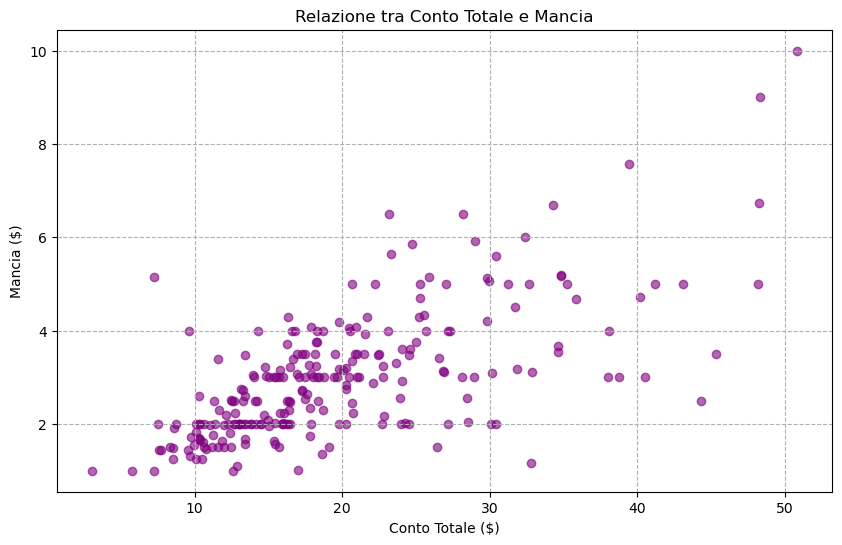

In [10]:
# --- 4. DATA VISUALIZATION ) ---
try:
    import matplotlib.pyplot as plt
    
    # Grafico a dispersione (Scatter Plot)
    plt.figure(figsize=(10, 6))
    
    # Disegniamo i punti: X=Conto, Y=Mancia
    plt.scatter(df['total_bill'], df['tip'], alpha=0.6, color='purple')
    
    plt.title('Relazione tra Conto Totale e Mancia')
    plt.xlabel('Conto Totale ($)')
    plt.ylabel('Mancia ($)')
    plt.grid(True, linestyle='--')
    
    print("\nGenerazione grafico in corso...")
    plt.show()
except ImportError:
    print("\nMatplotlib non trovato, ma l'analisi numerica è completa.")

In [11]:
print("--- LIVELLO 3: SEGMENTAZIONE E VISUALIZZAZIONE AVANZATA ---")

--- LIVELLO 3: SEGMENTAZIONE E VISUALIZZAZIONE AVANZATA ---


In [12]:
# --- 1. IL "BINNING" (Creare Fasce di Prezzo) ---
# I numeri esatti (14.50$, 32.10$) sono difficili da analizzare in gruppo.
# Creiamo delle categorie umane: "Economico", "Medio", "Costoso".
# Usiamo pd.cut per tagliare la colonna 'total_bill' in pezzi.

# Definiamo i limiti: 0-15$ (Basso), 15-30$ (Medio), 30-100$ (Alto)
bins = [0, 15, 30, 100]
etichette = ['Economico', 'Medio', 'Alto']

In [13]:
# Creiamo la nuova colonna 'Fascia_Spesa'
df['Fascia_Spesa'] = pd.cut(df['total_bill'], bins=bins, labels=etichette)

print("\nAbbiamo categorizzato i conti. Ecco un campione:")
print(df[['total_bill', 'Fascia_Spesa']].head(10))

# ORA RISPONDIAMO ALLA DOMANDA:
# Chi lascia la mancia (%) più alta? Chi spende poco o chi spende tanto?
analisi_fasce = df.groupby('Fascia_Spesa')['tip_pct'].mean()
print("\nPercentuale Mancia per Fascia di Spesa:")
print(analisi_fasce)


Abbiamo categorizzato i conti. Ecco un campione:
   total_bill Fascia_Spesa
0       16.99        Medio
1       10.34    Economico
2       21.01        Medio
3       23.68        Medio
4       24.59        Medio
5       25.29        Medio
6        8.77    Economico
7       26.88        Medio
8       15.04        Medio
9       14.78    Economico

Percentuale Mancia per Fascia di Spesa:
Fascia_Spesa
Economico    18.349864
Medio        15.644156
Alto         12.205164
Name: tip_pct, dtype: float64


C:\Users\matte\AppData\Local\Temp\ipykernel_24312\3554105745.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  analisi_fasce = df.groupby('Fascia_Spesa')['tip_pct'].mean()


In [14]:
# --- 2. LA HEATMAP (Mappa di Calore) ---
# Riprendiamo la Pivot Table che abbiamo fatto prima (Giorno vs Orario).
# Leggere una tabella di numeri è noioso. Coloriamola.

# Ricreo la pivot table per sicurezza
pivot_presenze = df.pivot_table(index='day', columns='time', values='size', aggfunc='count', fill_value=0)
order = ['Thur', 'Fri', 'Sat', 'Sun']
pivot_presenze = pivot_presenze.reindex(order)

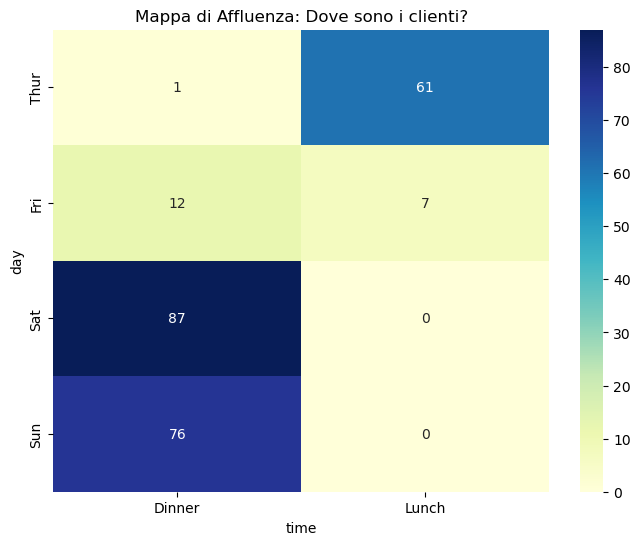


File 'report_ristorante_avanzato.csv' salvato con successo!


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# sns.heatmap colora le celle in base al valore.
# annot=True scrive i numeri dentro le celle.
# cmap='YlGnBu' è la scala di colori (Giallo-Verde-Blu).
sns.heatmap(pivot_presenze, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Mappa di Affluenza: Dove sono i clienti?')
plt.show()

# --- 3. EXPORT FINALE (Salvare il lavoro) ---
# Un analista deve consegnare i risultati.
# Salviamo il nostro DataFrame arricchito (con le nuove colonne 'tip_pct', 'spesa_per_persona', 'Fascia_Spesa')
# Lo salviamo in un file CSV che si può aprire con Excel.

df.to_csv('report_ristorante_avanzato.csv', index=False)
print("\nFile 'report_ristorante_avanzato.csv' salvato con successo!")

In [16]:
# .unstack() prende l'indice interno (smoker) e lo sposta nelle colonne
tabella_pulita = df.groupby(['Fascia_Spesa', 'smoker'])['tip'].mean().unstack()

print("\n--- Tabella Finale: Mancia Media ($) ---")
print(tabella_pulita)


--- Tabella Finale: Mancia Media ($) ---
smoker              No       Yes
Fascia_Spesa                    
Economico     2.010980  2.119310
Medio         3.106588  3.337021
Alto          5.676667  3.618235


C:\Users\matte\AppData\Local\Temp\ipykernel_24312\2939889777.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabella_pulita = df.groupby(['Fascia_Spesa', 'smoker'])['tip'].mean().unstack()
